# Bike Sharing Analysis With Bay Wheels's Trip Data
## by Deepshikha Patni

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> Recently acquired by Lyft, Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California It first launched in 2013, later became one of the most welcomed bike-sharing services on the west coast in the U.S.

> Here, we will be performing data analysis using Bay Wheel's data for the year 2019 and 2020 comparing and analysing the impact on Bike share ride due to Novel Coronavirus effect. 

<a id='wrangling'></a>
## Preliminary Wrangling

> In this analysis, dataset used consist of monthly individual trip data from April 2019 to June 2019 and April 2020 to June 2020 in '.csv' format covering San Francisco Bay Area. In the datasets, there are 15 columns with 613046 rows values for data of year 2019 while there are 14 columns with 380678  rows values for data of year 2020 referring to observations.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from zipfile import ZipFile
import os
import requests
import glob
import missingno as msno

%matplotlib inline

plt.rcParams['patch.force_edgecolor'] = True

## 1) Data Gathering
> **Step 1**: Downloading zip files programatically

In [2]:
#urls from where the bay wheels data for year 2019 and 2020 is downloaded
url_19 = ["https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip",
          "https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip",
          "https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip"]

In [3]:
#Make a directory to keep all the zipped file
folder = 'bay_wheels_data_2019'
if not os.path.exists(folder):
    os.makedirs(folder)

In [4]:
# Now, downloading each file one by one. (This may take a while to downlaod all the files)
for link in url_19:
    response = requests.get(link)
    with open(os.path.join(folder, link.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

> **Step 2:** Extract zip files and concat them to form the dataset

In [5]:
#Unzipping all the files 
for zipdata in glob.glob('bay_wheels_data_2019/*.zip'):
    with ZipFile(zipdata, 'r') as zip:
        zip.extractall()

In [6]:
#using **glob** module and **concat** to convert all the .csv files into one Dataset
files = glob.glob('2019*.csv')
frames = [pd.read_csv(datafile) for datafile in files]
bike_data_19 = pd.concat(frames, ignore_index = True, sort = False)

C:\Users\Ankit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
bike_data_19.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No,NaN
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No,NaN
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No,NaN
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No,NaN
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No,NaN


> Repeat all the above steps for downloading and creating another dataset for the year 2020

In [8]:
url_20= ["https://s3.amazonaws.com/baywheels-data/202004-baywheels-tripdata.csv.zip",
         "https://s3.amazonaws.com/baywheels-data/202005-baywheels-tripdata.csv.zip",
         "https://s3.amazonaws.com/baywheels-data/202006-baywheels-tripdata.csv.zip"]

In [9]:
folder = 'bay_wheels_data_2020'
if not os.path.exists(folder):
    os.makedirs(folder)

In [10]:
for links in url_20:
    response = requests.get(links)
    with open(os.path.join(folder, links.split('/')[-1]), mode = 'wb') as files:
        files.write(response.content)

In [11]:
for zipdata in glob.glob('bay_wheels_data_2020/*.zip'):
    with ZipFile(zipdata, 'r') as zip:
        zip.extractall()

In [12]:
files = glob.glob('2020*.csv')
frames = [pd.read_csv(datafile) for datafile in files]
bike_data_20 = pd.concat(frames, ignore_index = True, sort = False)

In [13]:
bike_data_20.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,5A1FF31692371859,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,NaN,NaN,37.7692,-122.4209,37.7703,-122.4069,casual,NaN
1,D8D5BA2D4F051133,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,NaN,NaN,37.8023,-122.4244,37.8023,-122.4244,casual,NaN
2,A3633A9140CA4FF8,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,NaN,NaN,37.7667,-122.3961,37.7667,-122.3962,casual,NaN
3,301F57EB0197A5E0,electric_bike,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,60.0,NaN,NaN,37.7744,-122.4095,37.7805,-122.4033,casual,NaN
4,9429C701AF5744B3,electric_bike,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,NaN,NaN,37.8027,-122.4433,37.8009,-122.4269,casual,NaN


>**Step 4**: Save bike_data_2019 & bike_data_2020 dataframe to master csv file in the same current directory

>**Note** - This step is done so that I don't have to repeat the above steps everytime I open the notebook because the codes in the above steps take time to process. You can skip this step if you do not want an extra file to occupy some space on your machine

In [14]:
bike_data_19.to_csv('master-dataset-bike-data-2019.csv', index=False)

In [15]:
bike_data_20.to_csv('master-dataset-bike-data-2020.csv', index=False)

> **Step 5**: Creating the data frame with newly generated csv 

> **Note**: Note - Now, I do not need to follow the above steps when I run the notebook next time. I can start working from this step directly

In [16]:
df_19 = pd.read_csv('master-dataset-bike-data-2019.csv')

C:\Users\Ankit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
df_20 = pd.read_csv('master-dataset-bike-data-2020.csv')

C:\Users\Ankit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2) Assessing the Data
> Here I will assess the whole dataset and mention the Quality and Tidiness issues at the end

In [18]:
# Visually checking the datasets created above
df_19.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No,NaN
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No,NaN
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No,NaN
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No,NaN
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No,NaN


In [19]:
df_20.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,5A1FF31692371859,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,NaN,NaN,37.7692,-122.4209,37.7703,-122.4069,casual,NaN
1,D8D5BA2D4F051133,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,NaN,NaN,37.8023,-122.4244,37.8023,-122.4244,casual,NaN
2,A3633A9140CA4FF8,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,NaN,NaN,37.7667,-122.3961,37.7667,-122.3962,casual,NaN
3,301F57EB0197A5E0,electric_bike,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,60.0,NaN,NaN,37.7744,-122.4095,37.7805,-122.4033,casual,NaN
4,9429C701AF5744B3,electric_bike,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,NaN,NaN,37.8027,-122.4433,37.8009,-122.4269,casual,NaN


In [20]:
# Checking the metadata for the dataframes
df_19.info()
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613046 entries, 0 to 613045
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             613046 non-null  int64  
 1   start_time               613046 non-null  object 
 2   end_time                 613046 non-null  object 
 3   start_station_id         610807 non-null  float64
 4   start_station_name       610807 non-null  object 
 5   start_station_latitude   613046 non-null  float64
 6   start_station_longitude  613046 non-null  float64
 7   end_station_id           610705 non-null  float64
 8   end_station_name         610705 non-null  object 
 9   end_station_latitude     613046 non-null  float64
 10  end_station_longitude    613046 non-null  float64
 11  bike_id                  613046 non-null  int64  
 12  user_type                613046 non-null  object 
 13  bike_share_for_all_trip  609153 non-null  object 
 14  rent

In [21]:
# Checking for duplicates in the Data
sum(df_19.duplicated())

0

In [22]:
sum(df_20.duplicated())

0

In [23]:
#Checking number of unique values in the datasets
df_19.nunique()

duration_sec                 8442
start_time                 612989
end_time                   612977
start_station_id              374
start_station_name            375
start_station_latitude       2523
start_station_longitude      2534
end_station_id                374
end_station_name              375
end_station_latitude         2624
end_station_longitude        2629
bike_id                      5125
user_type                       2
bike_share_for_all_trip         2
rental_access_method            2
dtype: int64

In [24]:
df_20.nunique()

ride_id               380678
rideable_type              2
started_at            363060
ended_at              362467
start_station_name       452
start_station_id         448
end_station_name         454
end_station_id           450
start_lat              43114
start_lng              45490
end_lat                43614
end_lng                45715
member_casual              2
is_equity                  2
dtype: int64

In [25]:
#Checking the dimensions of the dataframes.
df_19.shape

(613046, 15)

In [26]:
df_20.shape

(380678, 14)

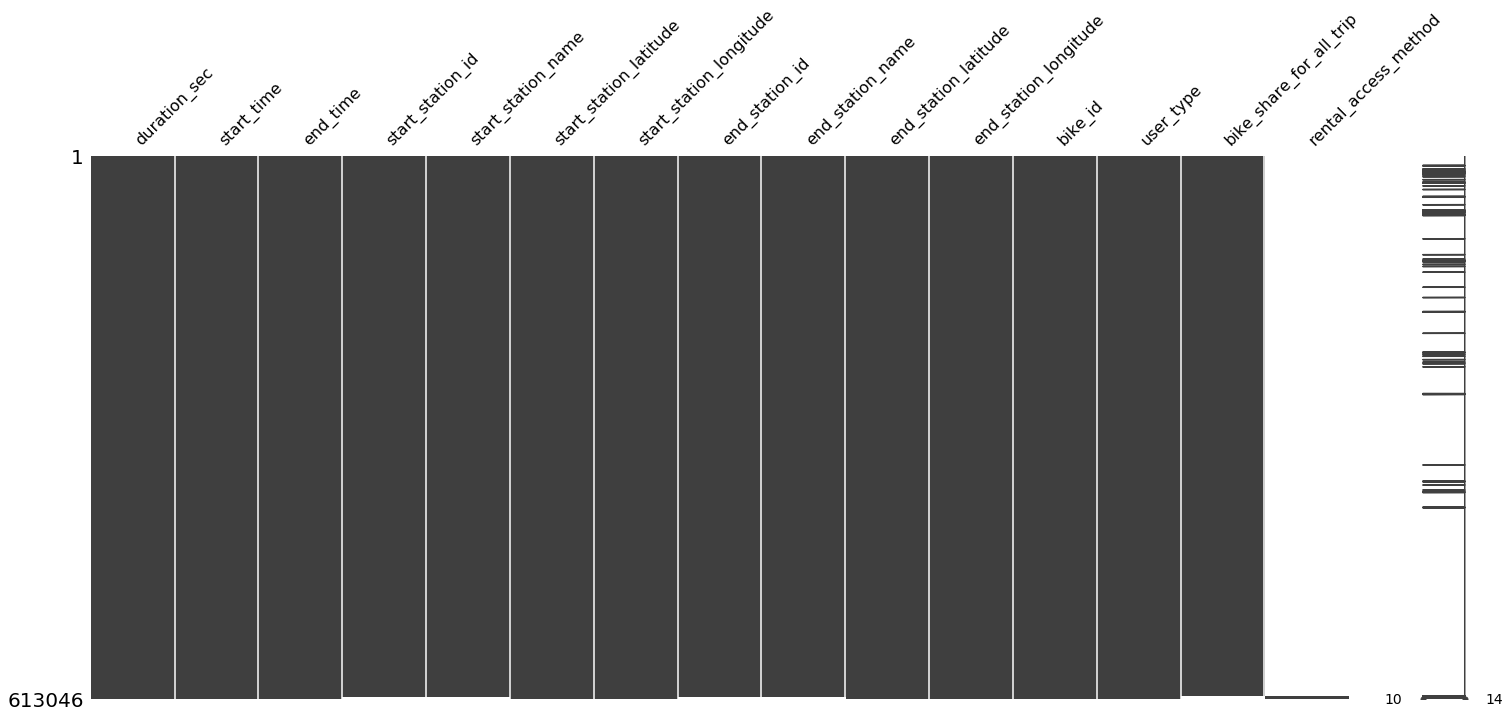

In [27]:
# visualizing missing value
msno.matrix(df_19);

> We can see from the above visualisation that in the dataset df_19, **rental_access_method** has got maximum 'null' values.

In [28]:
#Confirming total number of null values in each column of the dataset as per the above visualisation
df_19.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id             2239
start_station_name           2239
start_station_latitude          0
start_station_longitude         0
end_station_id               2341
end_station_name             2341
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
bike_share_for_all_trip      3893
rental_access_method       609153
dtype: int64

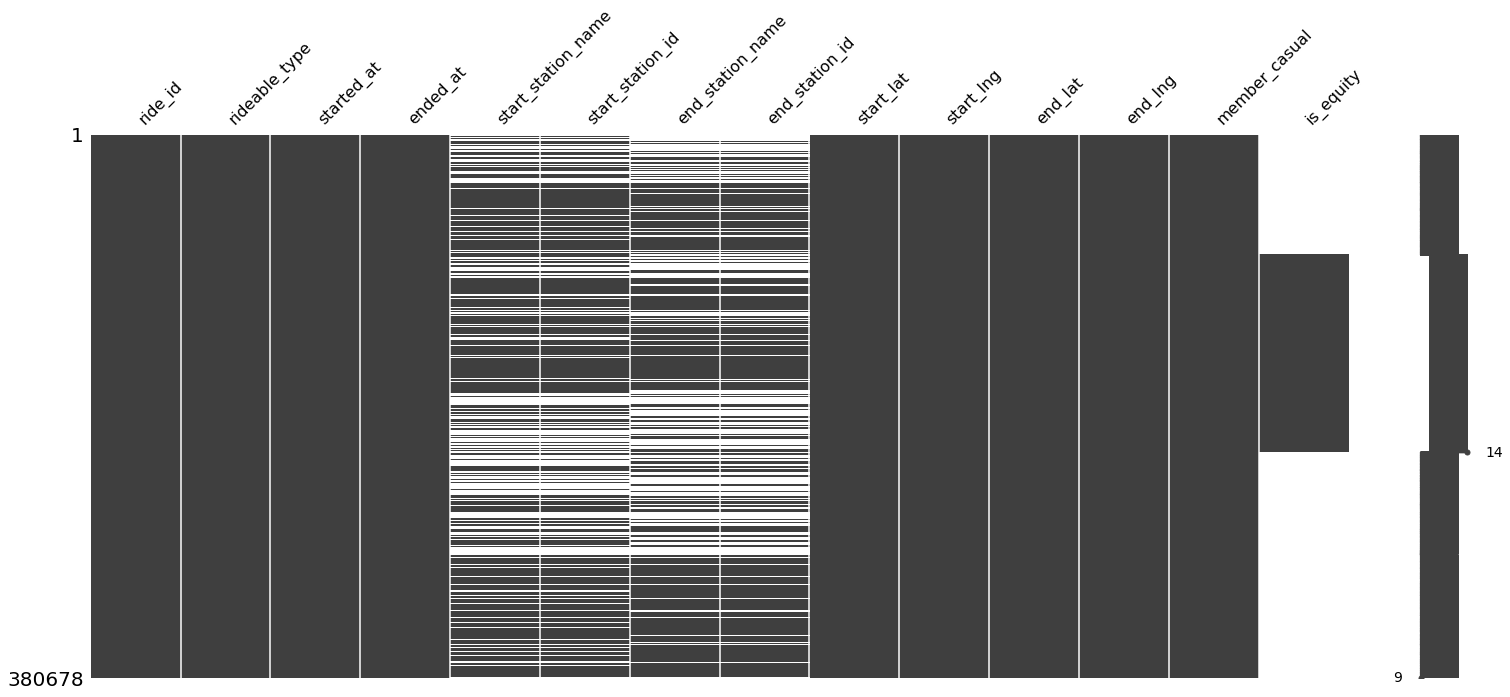

In [29]:
# visualizing missing values in dataset of year 2020
msno.matrix(df_20);

> We can see from the above visualisation that dataset df_20 has got few null values in station info of the trip and highest null values in column **is_equity**

In [30]:
#Confirming total number of null values in each column of the dataset as per the above visualisation
df_20.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    140709
start_station_id      140709
end_station_name      146890
end_station_id        146890
start_lat                  0
start_lng                  0
end_lat                  642
end_lng                  642
member_casual              0
is_equity             242427
dtype: int64

In [31]:
# Check if the number of unique values of start_station_id and start_station_name match
df_19.start_station_id.nunique(), df_19.start_station_name.nunique()

(374, 375)

In [32]:
df_20.start_station_id.nunique(), df_20.start_station_name.nunique()

(448, 452)

In [33]:
#checking descriptive statistics for numeric variables
df_19.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,613046.000000,610807.000000,613046.000000,613046.000000,610705.000000,613046.000000,613046.000000,613046.000000
mean,811.822865,141.099051,37.765585,-122.349470,139.341147,37.764693,-122.345506,5343.026610
std,1925.397795,117.184312,0.118645,0.209565,116.970630,0.231520,0.677402,38377.026313
min,60.000000,3.000000,0.000000,-122.453704,3.000000,0.000000,-122.453704,11.000000
25%,359.000000,44.000000,37.770030,-122.411901,43.000000,37.770407,-122.411403,1204.000000
50%,573.000000,101.000000,37.780526,-122.398113,99.000000,37.780760,-122.397086,2360.000000
75%,893.000000,239.000000,37.795913,-122.290231,236.000000,37.797280,-122.291360,3522.000000
max,86114.000000,443.000000,45.510000,0.000000,443.000000,45.510000,0.000000,985110.000000


In [34]:
df_20.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,239969.000000,233788.000000,380678.000000,380678.000000,380036.000000,380036.000000
mean,225.235935,222.892082,37.722349,-122.342257,37.722295,-122.342487
std,169.505052,169.208394,0.151551,0.182445,0.151621,0.182584
min,3.000000,3.000000,37.239200,-122.514300,37.004600,-122.559000
25%,73.000000,74.000000,37.760000,-122.432100,37.760000,-122.431946
50%,172.000000,162.000000,37.773506,-122.411800,37.773500,-122.411800
75%,381.000000,381.000000,37.787500,-122.390200,37.787710,-122.390288
max,532.000000,532.000000,37.880222,-121.770000,37.962100,-121.560600


##  Analysis 
<ul>
    <li> In dataset of year 2019, we have 613046 rows and 15 columns while the dataset of year 2020 has 380678 rows and 14 columns. </li>
    <li> We noticed that recently in year 2020 dataset, few entities column name have been renamed with values meaning the same like **user_type** given in dataset of year 2019 is changed to **member_casual**. Similarily, **bike_share_for_all_trip** has been changed to **is_equity** as also mentioned on Bay Wheels data site. </li>
    <li> We analysed that there are some irrelevant columns like 'start_station_latitude', 'end_station_latitude', 'ride_id','bike_id present in our datasets. So we will be dropping it. </li>
    <li> We found that **rental_access_method** column in the data of year 2019 is having many **null** values which need to be removed to avoid discrepancy. </li>
    <li> Need to change data type of 'start_time' and 'end_time' to datetime.</li>
    <li> Separating date, hour, day, month from start_time and end_time columns for accurate analysis.</li> 
</ul>

# 2) Cleaning the data

In [35]:
#Dropping irrelevant columns from  both the datasets.
df_19.drop (['duration_sec', 'bike_id', 'rental_access_method'], axis=1, inplace=True)
df_19.shape

(613046, 12)

In [36]:
df_20.drop (['ride_id'], axis=1, inplace=True)
df_20.shape

(380678, 13)

In [37]:
#Deleting all the null values in our datasets
df_19 = df_19.dropna()
df_19.isnull().sum()

start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

In [38]:
df_20 = df_20.dropna()
df_20.isnull().sum()

rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
is_equity             0
dtype: int64

In [39]:
# changing datatype of 'start_time' and 'end_time' columns to datetime
df_19['start_time'] = pd.to_datetime(df_19['start_time'])
df_19['end_time'] = pd.to_datetime(df_19['end_time'])
df_20['started_at'] = pd.to_datetime(df_20['started_at'])
df_20['ended_at'] = pd.to_datetime(df_20['ended_at'])

In [40]:
# verifying data type of columns is changed
df_19.info()
df_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609074 entries, 0 to 609152
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               609074 non-null  datetime64[ns]
 1   end_time                 609074 non-null  datetime64[ns]
 2   start_station_id         609074 non-null  float64       
 3   start_station_name       609074 non-null  object        
 4   start_station_latitude   609074 non-null  float64       
 5   start_station_longitude  609074 non-null  float64       
 6   end_station_id           609074 non-null  float64       
 7   end_station_name         609074 non-null  object        
 8   end_station_latitude     609074 non-null  float64       
 9   end_station_longitude    609074 non-null  float64       
 10  user_type                609074 non-null  object        
 11  bike_share_for_all_trip  609074 non-null  object        
dtypes: datetime64[ns

In [41]:
# separating start_date, start_hour, start_day, start_month from start_time column
df_19['start_date'] = df_19.start_time.dt.strftime('%Y-%m-%d')
df_19['start_hour'] = df_19.start_time.dt.strftime('%H')
df_19['start_day'] = df_19.start_time.dt.strftime('%A')
df_19['start_month'] = df_19.start_time.dt.strftime('%B')

df_20['start_date'] = df_20.started_at.dt.strftime('%Y-%m-%d')
df_20['start_hour'] = df_20.started_at.dt.strftime('%H')
df_20['start_day'] = df_20.started_at.dt.strftime('%A')
df_20['start_month'] = df_20.started_at.dt.strftime('%B')

In [42]:
# separating end_date, end_hour, end_day, end_month from end_time column
df_19['end_date'] = df_19.end_time.dt.strftime('%Y-%m-%d')
df_19['end_hour'] = df_19.end_time.dt.strftime('%H')
df_19['end_day'] = df_19.end_time.dt.strftime('%A')
df_19['end_month'] = df_19.end_time.dt.strftime('%B')

# separating end_date, end_hour, end_day, end_month from end_time column
df_20['end_date'] = df_20.ended_at.dt.strftime('%Y-%m-%d')
df_20['end_hour'] = df_20.ended_at.dt.strftime('%H')
df_20['end_day'] = df_20.ended_at.dt.strftime('%A')
df_20['end_month'] = df_20.ended_at.dt.strftime('%B')

In [43]:
print(df_19.shape)
df_19.head()

(609074, 20)


,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,bike_share_for_all_trip,start_date,start_hour,start_day,start_month,end_date,end_hour,end_day,end_month
0,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,Subscriber,No,2019-04-30,22,Tuesday,April,2019-05-01,12,Wednesday,May
1,2019-04-30 20:43:41.632,2019-05-01 11:39:06.917,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,Customer,No,2019-04-30,20,Tuesday,April,2019-05-01,11,Wednesday,May
2,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,Subscriber,No,2019-04-30,10,Tuesday,April,2019-05-01,08,Wednesday,May
3,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,Subscriber,No,2019-04-30,10,Tuesday,April,2019-05-01,07,Wednesday,May
4,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,Subscriber,No,2019-04-30,23,Tuesday,April,2019-05-01,00,Wednesday,May


In [44]:
print(df_20.shape)
df_20.head()

(70895, 21)


,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,...,member_casual,is_equity,start_date,start_hour,start_day,start_month,end_date,end_hour,end_day,end_month
84267,electric_bike,2020-05-11 15:28:48,2020-05-11 15:55:37,Willow St at Blewett Ave,473.0,Palm St at Willow St,300.0,37.3090,-121.9000,37.3172,...,casual,False,2020-05-11,15,Monday,May,2020-05-11,15,Monday,May
84269,electric_bike,2020-05-12 13:44:42,2020-05-12 13:56:21,Montgomery St BART Station (Market St at 2nd St),21.0,Mission Bay Kids Park,92.0,37.7905,-122.4015,37.7754,...,casual,False,2020-05-12,13,Tuesday,May,2020-05-12,13,Tuesday,May
84277,electric_bike,2020-05-29 07:46:05,2020-05-29 08:03:47,Market St at 10th St,58.0,17th Ave at Geary Blvd,477.0,37.7769,-122.4174,37.7807,...,casual,False,2020-05-29,07,Friday,May,2020-05-29,08,Friday,May
84286,electric_bike,2020-05-29 13:47:04,2020-05-29 14:03:50,Hyde St at Post St,369.0,Laurel St at California St,514.0,37.7876,-122.4166,37.7868,...,casual,False,2020-05-29,13,Friday,May,2020-05-29,14,Friday,May
84287,electric_bike,2020-05-29 09:55:45,2020-05-29 10:19:40,McAllister St at Arguello Blvd,455.0,Arguello Blvd at Geary Blvd,456.0,37.7753,-122.4580,37.7815,...,casual,False,2020-05-29,09,Friday,May,2020-05-29,10,Friday,May


### What is the structure of your dataset?

I have gathered and cleaned two datasets: **df_19** which has 609074 rows and 16 columns while **df_20** has 70895 rows and 17 columns.

<table> 
<tr>
    <th> Column Name </th>
    <th> Reason </th>
</tr>
         <tr>
            <td>duration_sec </td>
            <td>Not comparable in both the datasets </td>
         </tr>
         <tr>
            <td>bike_id </td>
            <td>Not comparable in both the datasets</td>
         </tr>
         <tr>
            <td>rental_access_method </td>
            <td>Contains too many null values</td>
         </tr>
         <tr>
            <td>ride_id </td>
            <td>Not comparable in both the datasets</td>
         </tr>
</table>

> The variables can be divided into 3 major categories:<ol><li> Trip Duration: start_time, end_time, started_at, ended_at </li>
    <li> Station Info: start_station_id, start_station_name, end_station_id, end_station_name </li>
    <li> Member Info (anonymized): user_type, bike_share_for_all_trip, member_casual, is_equity </li>
</ol>

>  Derived features/variables to assist exploration and analysis:
**trip info:** start_date, start_hour, start_day, start_month, end_date, end_hour, end_day, end_month

    
### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is the bike ride at different stations and how it is related to member_casual and is_equity. I am also interested in days, month data and impact due to Covid-19 in the data. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> <ul>
    <li> start_station_name </li>
    <li> user_type / member_casual  </li>
    <li> rideable_type </li>
    <li> start_day </li>
  </ul>

## Univariate Exploration

> In this section, we will investigate distributions of some individual variables of year 2019 & 2020 like **start_station_name, user_type, etc** to get a better understanding of the data. Here, the data visualization include data from months (April to June) for both 2019 and 2020 and identifying the trends.

> **Objective:** First we'll try to identify the originating station with maximum ride counts 

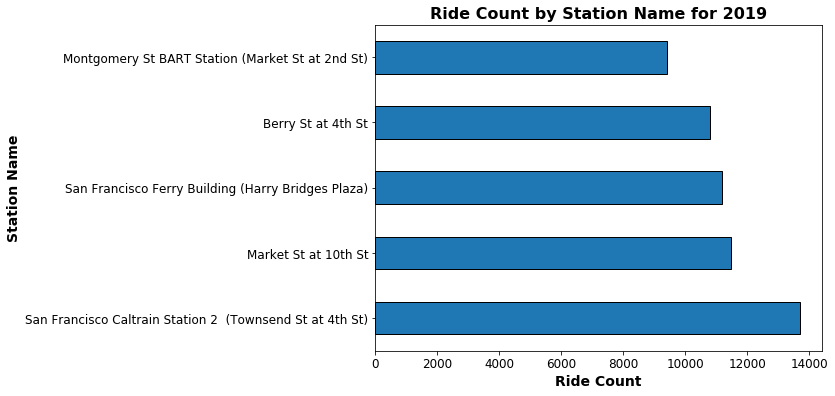

In [45]:
plt.figure(figsize=(8,6))
df_19['start_station_name'].value_counts().head().plot.barh()
plt.xlabel('Ride Count', fontsize=14, weight='bold')
plt.ylabel('Station Name', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Ride Count by Station Name for 2019', fontsize=16, weight='bold');

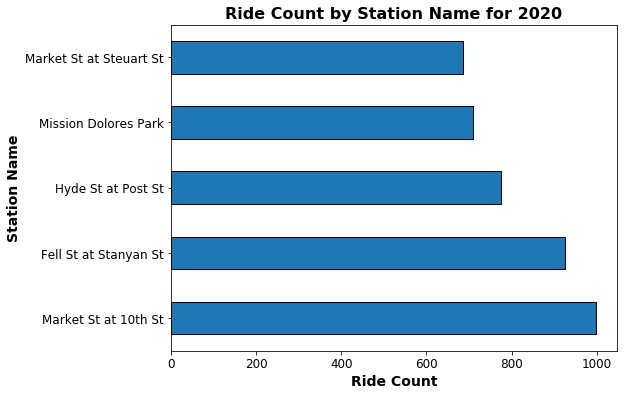

In [46]:
plt.figure(figsize = (8,6))
df_20['start_station_name'].value_counts().head().plot.barh()
plt.xlabel('Ride Count', fontsize=14, weight='bold')
plt.ylabel('Station Name', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Ride Count by Station Name for 2020', fontsize=16, weight='bold');

> **Observations:** <ul><li>The visualisation about **start_station_name** shows us that, though **San Francisco Caltrain Station 2** was the busiest starting station with a ride count ~13700 in 2019 but in 2020, it was not among the busiest station. </li> <li>Also **Market St at 10th St** station, from where ~11500 rides were originated back in 2019, saw only ~1000 rides getting originated in 2020. </li></ul>

> **Objective:**
To understand the contribution of customer vs subscriber in rides count, we'll use 'Bar Graph' to analyze **user_type** & **member_type** for 2019 and 2020. 
> As mentioned in Bay Wheels Data, recently, **Subscriber** has been renamed as **Member** and **Customer** as **Casual** so we'll consider these new names in our analysis.

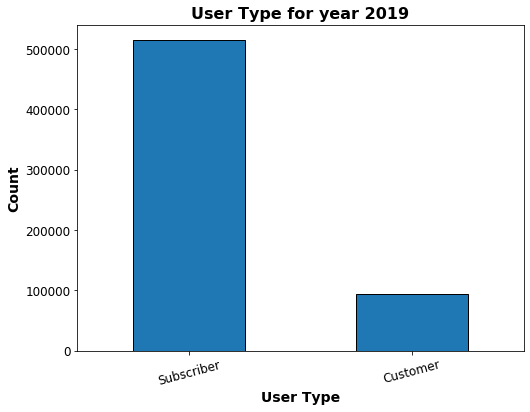

In [47]:
plt.figure(figsize = (8,6))
df_19['user_type'].value_counts().plot.bar()
plt.xlabel('User Type', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')
plt.xticks(fontsize=12, rotation = 15)
plt.yticks(fontsize=12)
plt.title('User Type for year 2019', fontsize=16, weight='bold');

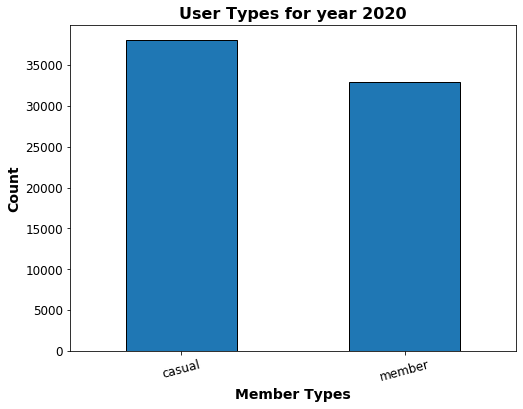

In [48]:
plt.figure(figsize = (8,6))
df_20['member_casual'].value_counts().plot.bar()
plt.xlabel('Member Types', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')
plt.xticks(fontsize=12, rotation = 15)
plt.yticks(fontsize=12)
plt.title('User Types for year 2020', fontsize=16, weight='bold');

> **Observations:**
<ul><li>We can clearly see that in 2019 there were more **Subscriber** (**Member**) with count more than 510k which has reduced a lot in 2020 to ~33k. </li>
<li>Similar trend could be observed in **Customer** count too i.e. in 2019 **Customer** (**Casual**) count was ~100k which dropped to ~38k in 2020.</li></ul>

> **Objective:**
Now to find which type of Bike is more popular among users, we will analyze **rideable_type**

<Figure size 720x720 with 0 Axes>

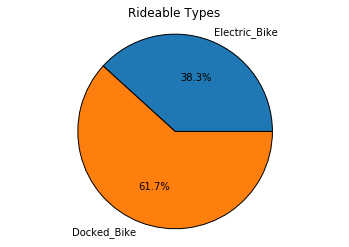

In [49]:
df_20['rideable_type'].value_counts()

labels = ['Electric_Bike', 'Docked_Bike']
sizes = [27119, 43776]

plt.figure(figsize = (10,10))
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Rideable Types')


plt.show()

> **Observation:**
In 2020, Docked bike were primarily used for rides as compared to electric bikes. 

>**Objective:**
> To investigate which day of the week noticed maximum rides, we can analyze the **start_day** variable

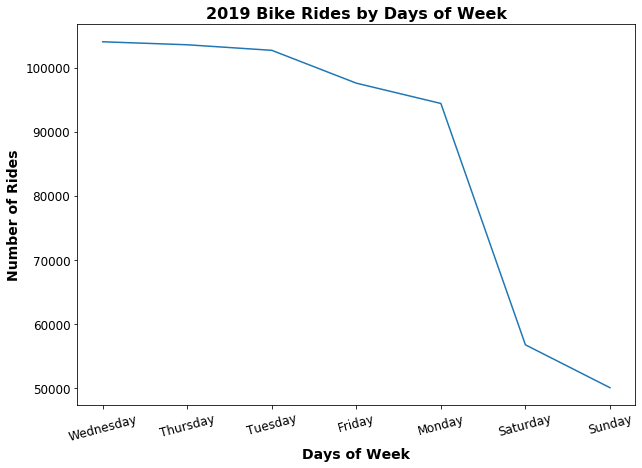

In [50]:
plt.figure(figsize = (10,7))
df_19['start_day'].value_counts().plot.line()
plt.xlabel('Days of Week', fontsize=14, weight='bold')
plt.ylabel('Number of Rides', fontsize=14, weight='bold')
plt.xticks(fontsize=12, rotation = 15)
plt.yticks(fontsize=12)
plt.title('2019 Bike Rides by Days of Week', fontsize=16, weight='bold');

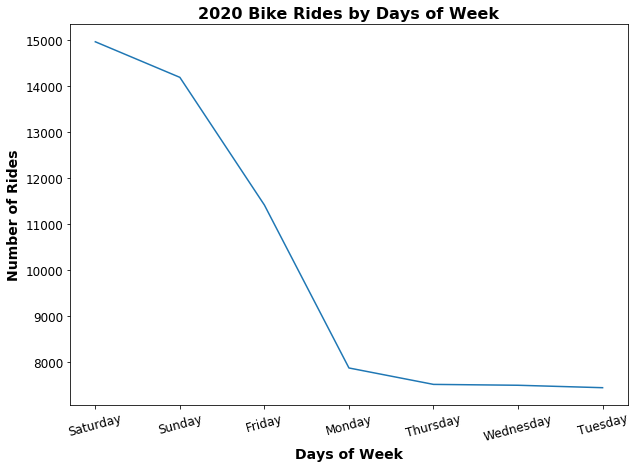

In [51]:
plt.figure(figsize = (10,7))
df_20['start_day'].value_counts().plot.line()
plt.xlabel('Days of Week', fontsize=14, weight='bold')
plt.ylabel('Number of Rides', fontsize=14, weight='bold')
plt.xticks(fontsize=12, rotation = 15)
plt.yticks(fontsize=12)
plt.title('2020 Bike Rides by Days of Week', fontsize=16, weight='bold');

> **Observations:**
> <ul><li>In 2019, maximum rides were done on Tuesday, Wednesday & Thursday </li> <li> In 2020, maximum rides were done on weekends i.e. Saturday & Sunday. </li></ul>

> **Objective:** To understand how many miles a bike has been driven.

In [52]:
#using haversine formula for calculating distance
from math import radians, cos, sin, asin, sqrt 

def dist_btwn_station(start_station,end_station):
    lat1, lon1 = start_station
    lat2, lon2 = end_station
    
    # radius of earth
    radius = 6371
    
    lat = radians(lat2 - lat1)
    lon = radians(lon2 - lon1)
    
    a = (sin(lat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(lon / 2)**2)
    
    c = 2 * asin(sqrt(a))
    
    distance = radius * c
    
    return distance

In [53]:
df_19['distance_miles'] = df_19.apply(lambda x: dist_btwn_station((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)
df_19.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,bike_share_for_all_trip,start_date,start_hour,start_day,start_month,end_date,end_hour,end_day,end_month,distance_miles
0,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,...,No,2019-04-30,22,Tuesday,April,2019-05-01,12,Wednesday,May,1.025420
1,2019-04-30 20:43:41.632,2019-05-01 11:39:06.917,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,...,No,2019-04-30,20,Tuesday,April,2019-05-01,11,Wednesday,May,1.844224
2,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,...,No,2019-04-30,10,Tuesday,April,2019-05-01,08,Wednesday,May,0.000000
3,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,...,No,2019-04-30,10,Tuesday,April,2019-05-01,07,Wednesday,May,1.347458
4,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,...,No,2019-04-30,23,Tuesday,April,2019-05-01,00,Wednesday,May,2.616046


In [54]:
# finding outliers in distance_miles
df_19['distance_miles'].describe(percentiles=[.99])

count    609074.000000
mean          2.085545
std          71.461186
min           0.000000
50%           1.444559
99%           5.030036
max       12798.346860
Name: distance_miles, dtype: float64

In [55]:
df_20['distance_miles'] = df_20.apply(lambda x: dist_btwn_station((x['start_lat'], x['start_lng']), (x['end_lat'], x['end_lng'])), axis=1)
df_20.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,...,is_equity,start_date,start_hour,start_day,start_month,end_date,end_hour,end_day,end_month,distance_miles
84267,electric_bike,2020-05-11 15:28:48,2020-05-11 15:55:37,Willow St at Blewett Ave,473.0,Palm St at Willow St,300.0,37.3090,-121.9000,37.3172,...,False,2020-05-11,15,Monday,May,2020-05-11,15,Monday,May,1.616995
84269,electric_bike,2020-05-12 13:44:42,2020-05-12 13:56:21,Montgomery St BART Station (Market St at 2nd St),21.0,Mission Bay Kids Park,92.0,37.7905,-122.4015,37.7754,...,False,2020-05-12,13,Tuesday,May,2020-05-12,13,Tuesday,May,1.844926
84277,electric_bike,2020-05-29 07:46:05,2020-05-29 08:03:47,Market St at 10th St,58.0,17th Ave at Geary Blvd,477.0,37.7769,-122.4174,37.7807,...,False,2020-05-29,07,Friday,May,2020-05-29,08,Friday,May,5.176209
84286,electric_bike,2020-05-29 13:47:04,2020-05-29 14:03:50,Hyde St at Post St,369.0,Laurel St at California St,514.0,37.7876,-122.4166,37.7868,...,False,2020-05-29,13,Friday,May,2020-05-29,14,Friday,May,2.936421
84287,electric_bike,2020-05-29 09:55:45,2020-05-29 10:19:40,McAllister St at Arguello Blvd,455.0,Arguello Blvd at Geary Blvd,456.0,37.7753,-122.4580,37.7815,...,False,2020-05-29,09,Friday,May,2020-05-29,10,Friday,May,0.692148


In [56]:
# finding outliers in distance_miles
df_20['distance_miles'].describe(percentiles=[.99])

count    70895.000000
mean         1.809072
std          1.573458
min          0.000000
50%          1.500005
99%          6.692570
max         17.508447
Name: distance_miles, dtype: float64

> We can see from statistics that there are many rows that contain '0' values. So, we will replace these values by NaN so as to have better visualisation.

In [57]:
#Checking and removing all the rows containing 0 values.
df_19.distance_miles.value_counts()

0.000000    14761
1.310345     2395
2.171534     1995
1.035589     1845
1.413548     1774
            ...  
5.142931        1
3.448530        1
1.914009        1
2.912935        1
3.311931        1
Name: distance_miles, Length: 19567, dtype: int64

In [58]:
df_19.replace(0, np.nan, inplace=True)
df_20.replace(0, np.nan, inplace=True)

In [59]:
df_20.distance_miles.value_counts()

0.011119    260
0.011119    242
4.870593    118
1.244921     73
1.000684     67
           ... 
1.173901      1
2.267481      1
0.831632      1
1.585064      1
4.884014      1
Name: distance_miles, Length: 31483, dtype: int64

> Now plotting the derived **distance_miles** variable for analyzing distance travelled by bikes.

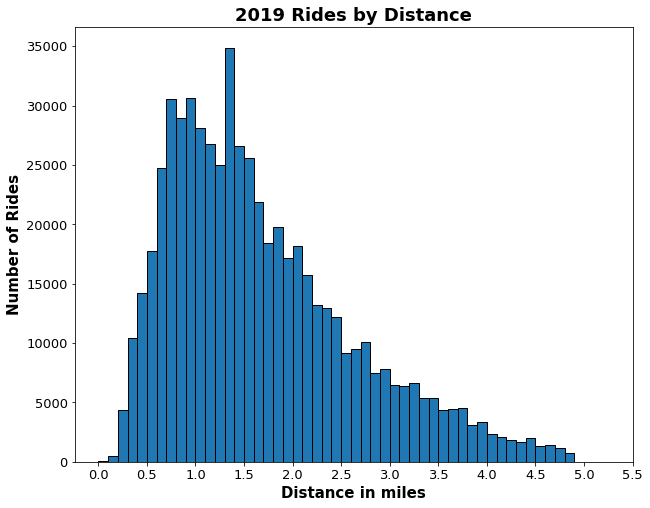

In [60]:
plt.figure(figsize=(10,8))

plt.hist(data = df_19, x='distance_miles',bins=np.arange(0,5,0.1))

plt.xlabel('Distance in miles', fontsize=15, weight='bold')
plt.ylabel('Number of Rides', fontsize=15, weight='bold')
plt.xticks(np.arange(0, 6, 0.5), fontsize=13)
plt.yticks(fontsize=13)
plt.title('2019 Rides by Distance', fontsize=18, weight='bold');

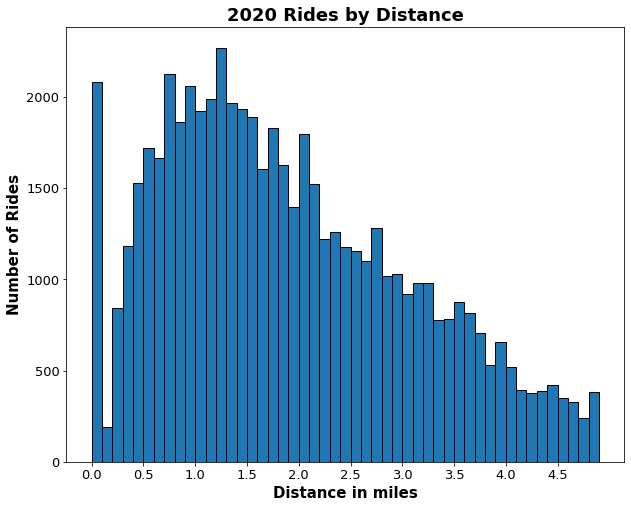

In [61]:
plt.figure(figsize=(10,8))

plt.hist(data = df_20, x='distance_miles',bins=np.arange(0,5,0.1))

plt.xlabel('Distance in miles', fontsize=15, weight='bold')
plt.ylabel('Number of Rides', fontsize=15, weight='bold')
plt.xticks(np.arange(0, 5, 0.5), fontsize=13)
plt.yticks(fontsize=13)
plt.title('2020 Rides by Distance', fontsize=18, weight='bold');

**Observations:** <ul><li> We noticed that in 2019, most of the rides are within 1 mile with 0.8 mile being the longest distance and the farthest ride being taken was less than 4.5 mile </li> <li> In 2020, we noticed that some rides being taken for distance greater than 4.5 mile as well and the maximum bike rides were taken for 0.7 miles. </li></ul>

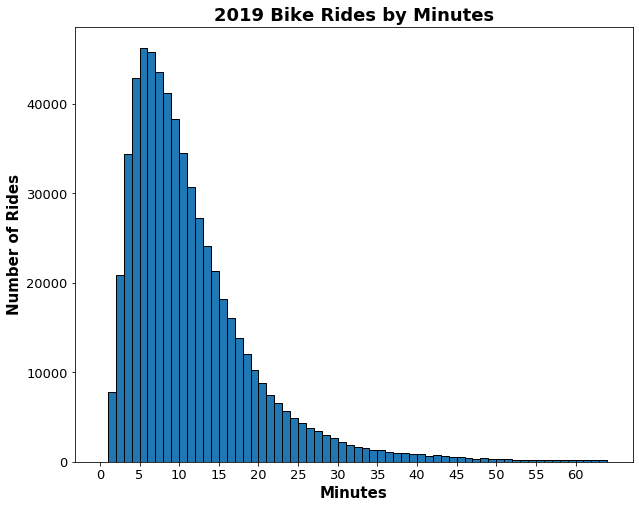

In [62]:
df_19['interval'] = df_19['end_time'] - df_19['start_time']
df_19['duration'] = df_19['interval'] / pd.Timedelta(minutes=1)

plt.figure(figsize=(10,8))

# plotting histogram for ride duration
plt.hist(data=df_19, x='duration',bins=np.arange(0, 65))

plt.xlabel('Minutes', fontsize=15, weight='bold')
plt.ylabel('Number of Rides', fontsize=15, weight='bold')
plt.xticks(np.arange(0, 65, 5), fontsize=13)
plt.yticks(fontsize=13)
plt.title('2019 Bike Rides by Minutes', fontsize=18, weight='bold');

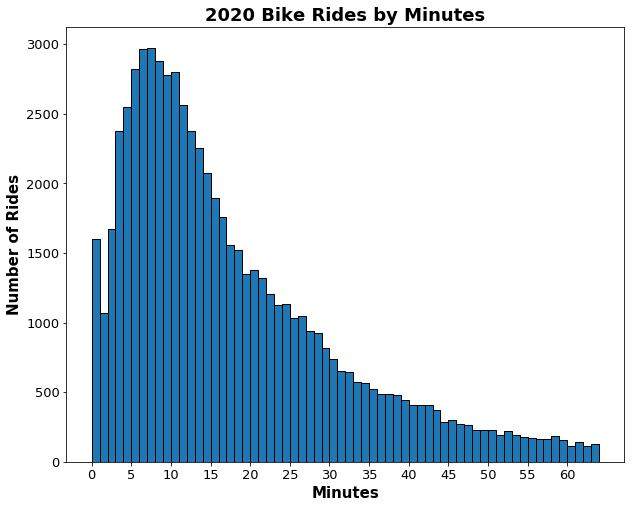

In [63]:
df_20['interval'] = df_20['ended_at'] - df_20['started_at']
df_20['duration'] = df_20['interval'] / pd.Timedelta(minutes=1)


plt.figure(figsize=(10,8))

# plotting histogram for ride duration
plt.hist(data=df_20, x='duration',bins=np.arange(0, 65))

plt.xlabel('Minutes', fontsize=15, weight='bold')
plt.ylabel('Number of Rides', fontsize=15, weight='bold')
plt.xticks(np.arange(0, 65, 5), fontsize=13)
plt.yticks(fontsize=13)
plt.title('2020 Bike Rides by Minutes', fontsize=18, weight='bold');

> **Observations:** <ul><li>In 2019, maximum rides are between 5 to 10 minutes with most rides in 5 minutes duration. Also we can see a sudden dip in number of rides as duration increases.</li> <li> But in 2020, maximum rides are between 5 to 15 minutes with most rides in ~7 minutes duration. </li></ul>

> To analyse in which hour were maximum bikes engaged in year 2019 and 2020, we will plot a graph using **start_hour** variable

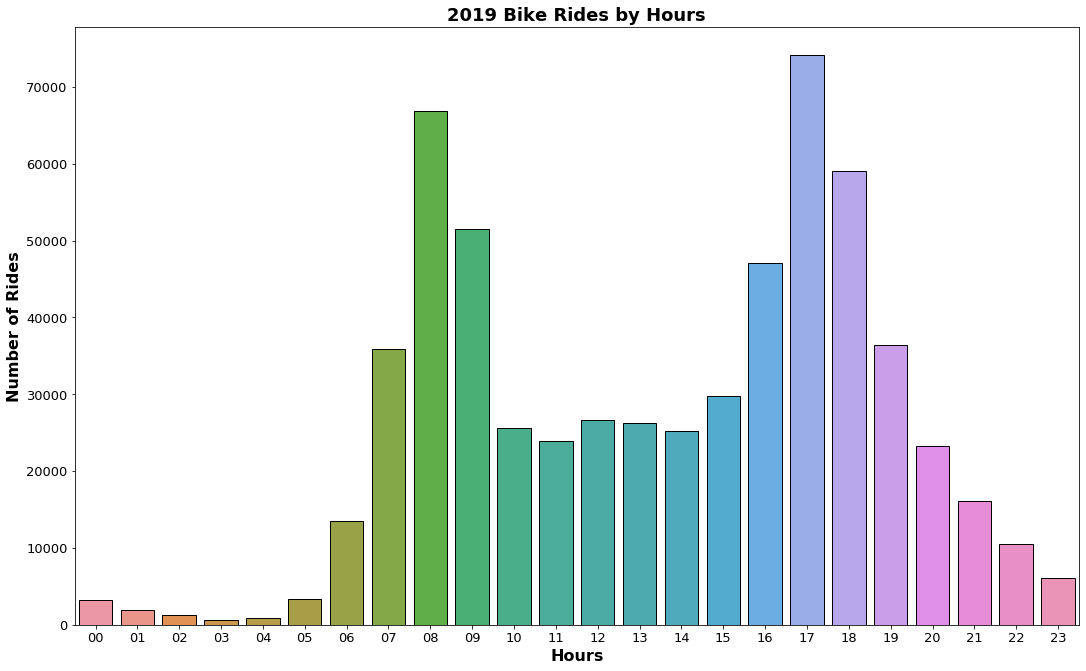

In [64]:
plt.figure(figsize=(18,11))

ax = plt.subplot(111)

ax = sb.countplot(data=df_19, x='start_hour', ax=ax) 

plt.ylabel('Number of Rides', fontsize=16, weight='bold')
plt.xlabel('Hours', fontsize=16, weight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('2019 Bike Rides by Hours', fontsize=18, weight='bold');

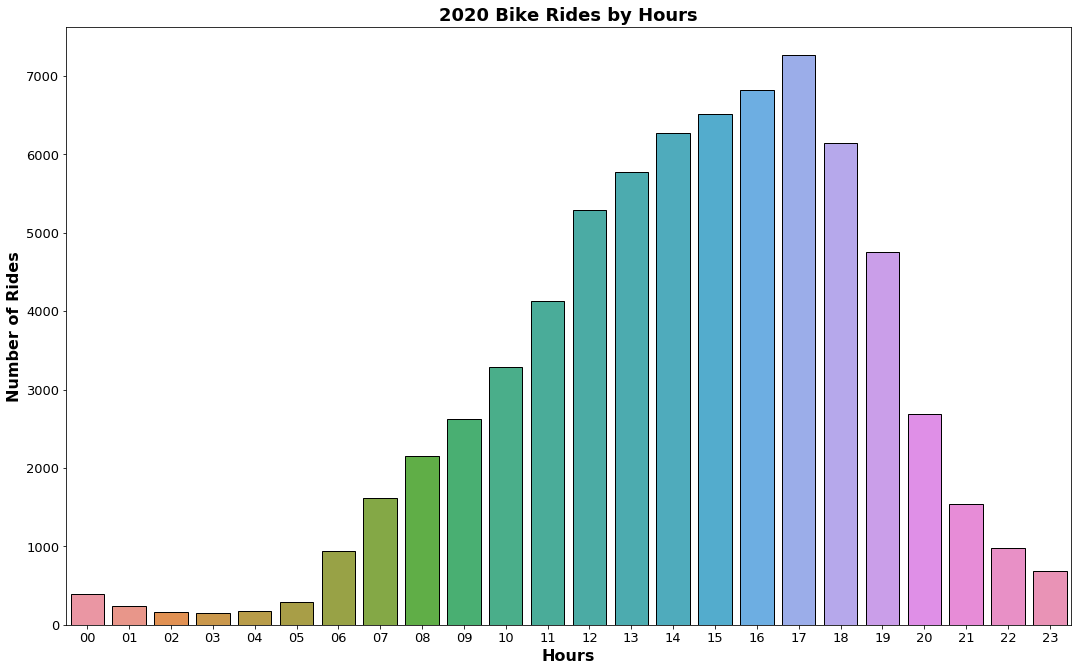

In [65]:
plt.figure(figsize=(18,11))

ax = plt.subplot(111)

ax = sb.countplot(data=df_20, x='start_hour', ax=ax) 

plt.ylabel('Number of Rides', fontsize=16, weight='bold')
plt.xlabel('Hours', fontsize=16, weight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('2020 Bike Rides by Hours', fontsize=18, weight='bold');

> **Observations:** <ul> <li>In 2019, most of the bikes were used either in morning hours i.e. between 7 to 9 am or in evening hours i.e. 4 to 6 pm. So, we can conclude that in year 2019, bikes were mostly engaged during peak office hours. </li> 
    <li>In 2020, we noticed that bike use frequency increases from 5 am onwards till 5 pm and then starts decreasing. </li></ul>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
<ol><li> In 2019 we noticed that there were more subscribed riders (members) as compared to casual riders but in 2020, we noticed a reversed trend i.e. casual riders count got increased than subscribed members count.   
This could be due to covid-19 pandemic in 2020, due to which most of the users could have been reluctant to subscribe for Bay Wheels Ride membership.</li>
    <li>In 2019, most rides were taken on weekdays i.e. (M-F) and less on weekends(S,S) while in 2020, we noticed a reverse trend i.e. most of the rides were taken on weekends (S,S) and less on weekdays (M-F).</li>
    <li> We noticed that in 2019, most of the rides are within 1 mile with 0.8 mile being the longest distance and the farthest ride being taken was less than 4.5 mile but in 2020, we noticed that some rides being taken for distance greater than 4.5 mile as well and the maximum bike rides were taken for 0.7 miles.</li>
    <li> We observed that in 2020, there is a gradual decrease in number of rides with increase in time, while in 2019, there was a sudden decrease in number of rides with increase in ride duration.</li>
    <li> Overall, we noticed that very less number of bikes were rented in 2020 as compared to 2019. This could be attrbuted due to covid-19 pandemic situation in 2020 where in people were reluctant to go out. Also in 2020, more bikes were used during 8 am - 5 pm as compared to the rest of the day but we couldn't notice the similar trend where in bikes were mostly rented during peak office hours i.e. 8-9 am in the morning and 3-5 pm in the evening. This could be due to work from home and shelter in place order from April-June 2020</li></ol>
    
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
<ol><li>Yes, I did perform transformation on ride duration. It was in hours so I converted it into minute for easily interpretation.</li>
<li> I also calculated the distance (in miles) by using latitude and longitude to clearly visualize the distribution of rides with respect to ride distance</li></ol>




## Bivariate Exploration

> In this section we will investigate relationships between pairs of variables such as **start_station_name, start_hour, distance, user_type, etc** and try to find answers for below questions. 

### **Objective: What are the rush hours for different stations? Does the trend changes over the year?**
<li>To understand which station was most busy and at what time, we will plot a graph considering start_station_name & start_hour variables. </li>

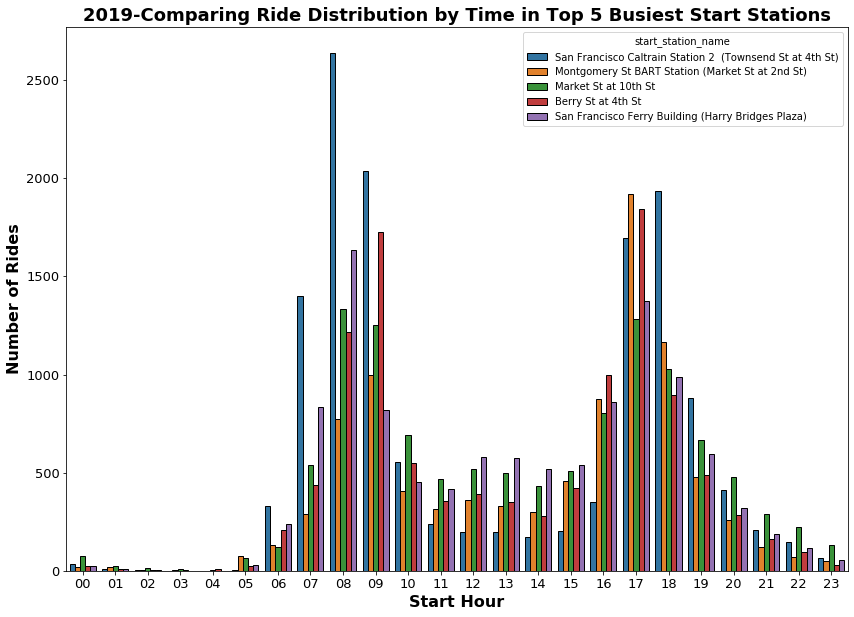

In [66]:
#start station name vs start hour
station_name_list = df_19['start_station_name'].value_counts().head().index.tolist()
station_name = df_19[df_19['start_station_name'].isin(station_name_list)]
plt.figure(figsize = (14,10))
sb.countplot(data = station_name, x = 'start_hour', hue = 'start_station_name')
plt.ylabel('Number of Rides', fontsize=16, weight='bold')
plt.xlabel('Start Hour', fontsize=16, weight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('2019-Comparing Ride Distribution by Time in Top 5 Busiest Start Stations', fontsize=18, weight='bold');

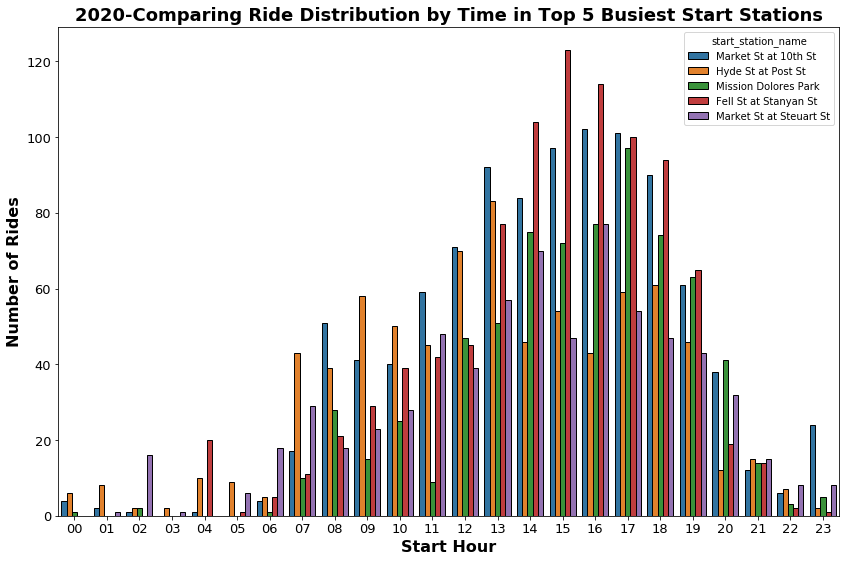

In [67]:
station_name_list = df_20['start_station_name'].value_counts().head().index.tolist()
station_name = df_20[df_20['start_station_name'].isin(station_name_list)]
plt.figure(figsize = (14,9))
sb.countplot(data = station_name, x = 'start_hour', hue = 'start_station_name')
plt.ylabel('Number of Rides', fontsize=16, weight='bold')
plt.xlabel('Start Hour', fontsize=16, weight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('2020-Comparing Ride Distribution by Time in Top 5 Busiest Start Stations', fontsize=18, weight='bold');

> **Observations:** <ul>
    <li> In 2019, **San Francisco Caltrain Station 2** seems to be the busiest station at around 7am-9am in the morning and then again 5pm - 6pm in the evening.</li>
    <li> In 2020, during morning hours i.e from 7am - 9am, **Hyde St at Post St** seems to be the busiest station while in evening hours i.e. 5pm - 6pm, **Fell St at Stanyan St** observed the highest traffic. </li>
    <li> Also, it can be seen that in 2019, highest number of rides that were taken from any station is **~2600** from **San Francisco Caltrain Station 2** but in 2020, highest number of rides taken from any station drastically dropped to **~125**  </li>
    </ul>

   ###  **Objective: How long does the average trip takes? Does it changes over the weekday?**
<li>To find the relation between ride's duration and weekdays, we will plot a bivariate graph. </li>

In [68]:
#To calculate the average of ride's duration by week day
print(df_19.groupby('start_day')['duration'].mean())
print(df_20.groupby('start_day')['duration'].mean())

start_day
Friday       13.172162
Monday       12.571965
Saturday     18.041170
Sunday       17.968556
Thursday     12.331583
Tuesday      12.428176
Wednesday    12.494186
Name: duration, dtype: float64
start_day
Friday       29.039782
Monday       37.328012
Saturday     38.421365
Sunday       40.733595
Thursday     24.519005
Tuesday      25.254002
Wednesday    30.391739
Name: duration, dtype: float64


In [69]:
#Since the duration is widely distributed,so we decided to sub cut the original df to get a better visualization
df_19_50 = df_19.loc[df_19['duration'] <= 50]
df_20_50 = df_20.loc[df_20['duration'] <= 50]

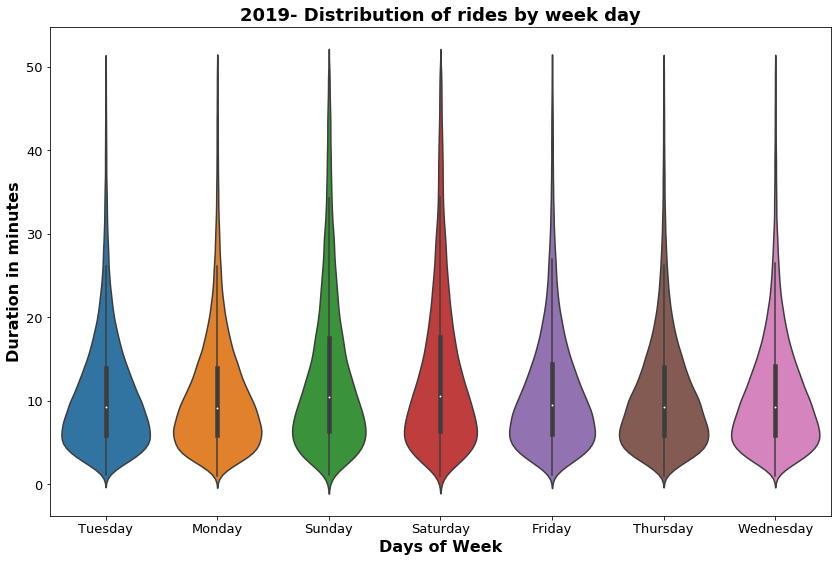

In [70]:
#Violin Visualization
plt.figure(figsize = (14,9))
sb.violinplot(data = df_19_50 , x = 'start_day' , y = 'duration')
plt.ylabel('Duration in minutes', fontsize=16, weight='bold')
plt.xlabel('Days of Week', fontsize=16, weight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('2019- Distribution of ride''s by week day', fontsize=18, weight='bold');

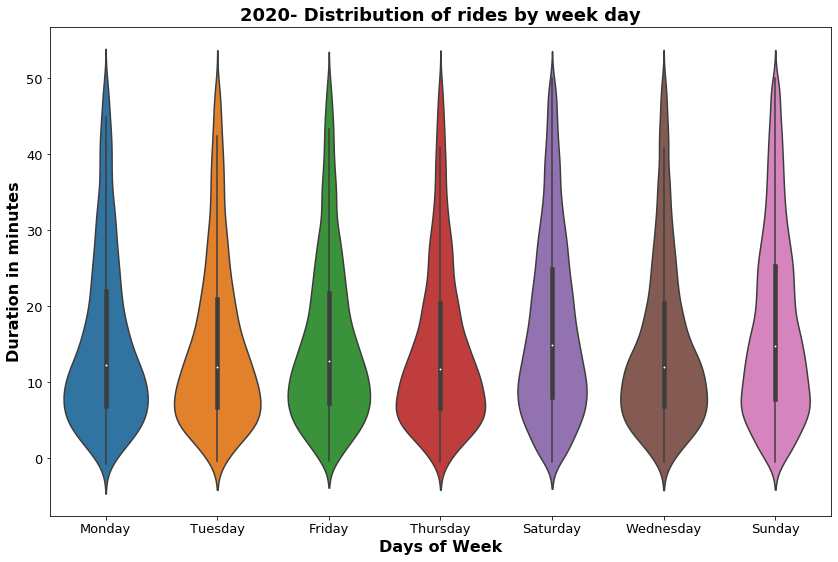

In [71]:
plt.figure(figsize = (14,9))
sb.violinplot(data = df_20_50 , x = 'start_day' , y = 'duration')
plt.ylabel('Duration in minutes', fontsize=16, weight='bold')
plt.xlabel('Days of Week', fontsize=16, weight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('2020- Distribution of ride''s by week day', fontsize=18, weight='bold');

**Observations:** In both 2019 and 2020, we observed that the ride's duration is significantly larger on weekends than on weekdays. Also, it can be intrepreted that more rides were taken on weekdays than on weekends.

### **Objective:** Does the ride frequency depends on the user type? Does it changes over the week day?
To evaluate Number of rides by User Type on Week Days

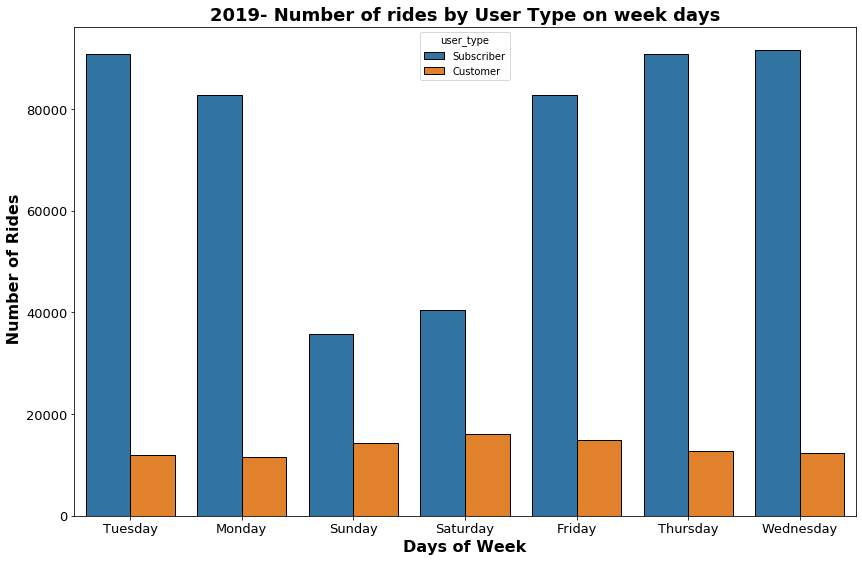

In [72]:
plt.figure(figsize = (14,9))
sb.countplot(data = df_19 , x = 'start_day' , hue = 'user_type')
plt.ylabel(' Number of Rides', fontsize=16, weight='bold')
plt.xlabel('Days of Week', fontsize=16, weight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('2019- Number of rides by User Type on week days', fontsize=18, weight='bold');

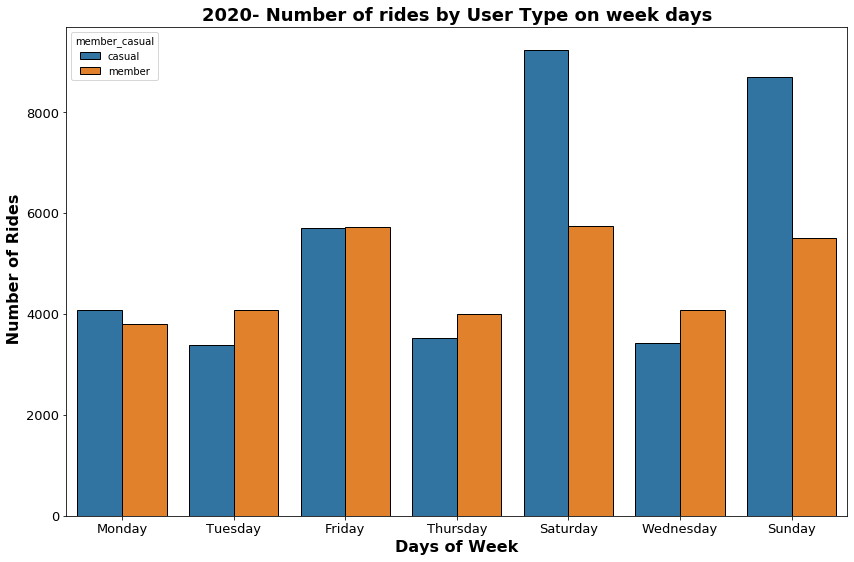

In [73]:
plt.figure(figsize = (14,9))
sb.countplot(data = df_20 , x = 'start_day' , hue = 'member_casual')
plt.ylabel(' Number of Rides', fontsize=16, weight='bold')
plt.xlabel('Days of Week', fontsize=16, weight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('2020- Number of rides by User Type on week days', fontsize=18, weight='bold');

> **Observations:** <ul>
    <li> In 2019, we noticed a considerable difference in the number of subscribers vs customers while in 2020 the difference was quite less between members and casuals</li>
    <li> It can be noted from above visualisation that in 2019, more number of rides were taken on weekdays than on weekends while in 2020 maximum rides were taken on weekends. </li>
    <li> Also, in 2019, more subscribers used BayWheels service as compared to Customers but in 2020, maximum number of rides were taken by Customers(renamed as Casuals) and not subscribers</li>
    </ul>

### **Objective:**  Does the ride duration depends on user types?
To understand the relationship between user type and duration, we will plot a scatter graph

In [74]:
#Since the duration is widely distributed,so we decided to sub cut the original df to get a better visualization
df_19_50 = df_19.loc[df_19['duration'] <= 70]
df_20_50 = df_20.loc[df_20['duration'] <= 70]

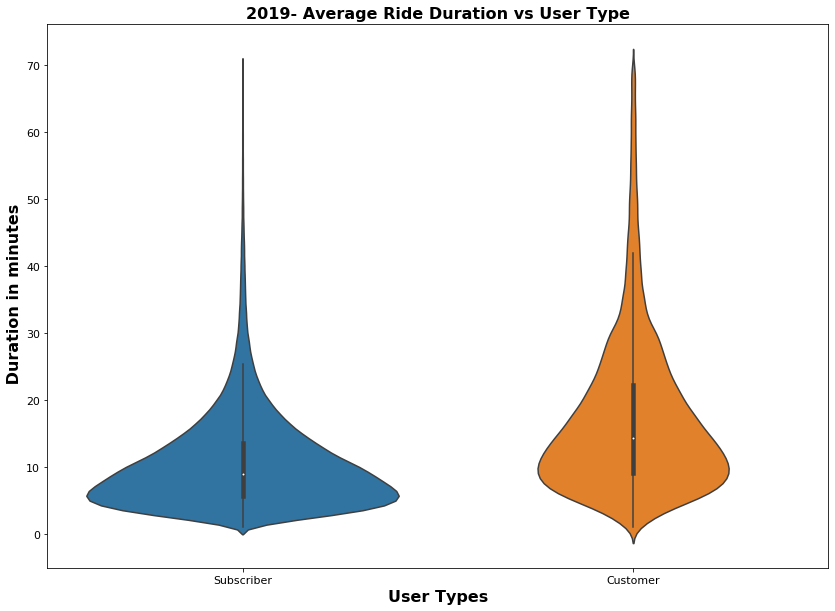

In [75]:
plt.figure(figsize = (14,10))
sb.violinplot(y ='duration', x ='user_type', data = df_19_50)
plt.ylabel(' Duration in minutes', fontsize=16, weight='bold')
plt.xlabel('User Types', fontsize=16, weight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('2019- Average Ride Duration vs User Type', fontsize=16, weight='bold');

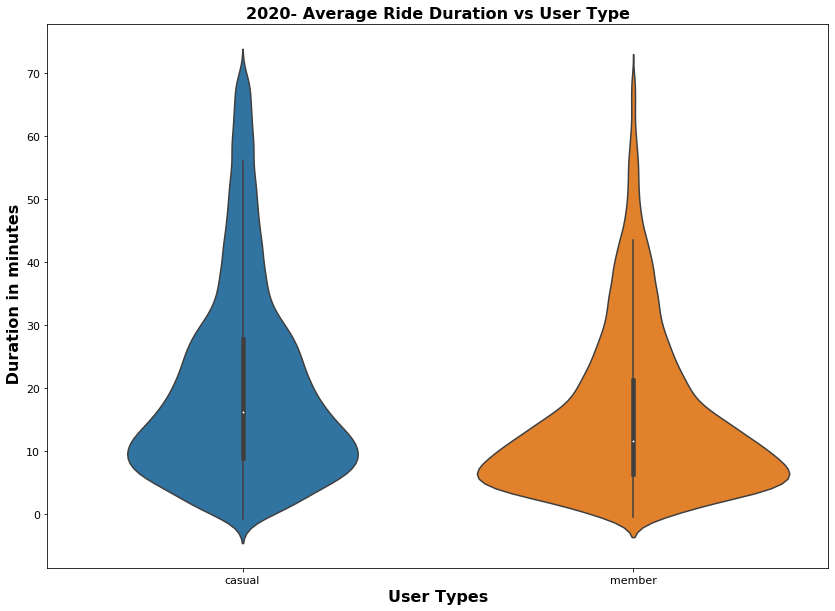

In [76]:
plt.figure(figsize = (14,10))
sb.violinplot(y ='duration', x ='member_casual', data = df_20_50)
plt.ylabel(' Duration in minutes', fontsize=16, weight='bold')
plt.xlabel('User Types', fontsize=16, weight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('2020- Average Ride Duration vs User Type', fontsize=16, weight='bold');

> **Observations:** It can be interpreted that for both 2019 & 2020, **subscribers or members** interquartile range is less than that of **customers or casual**. Also, duration of rides for casual customers was more as compared to subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

By above explorations, we attempted to understand and find out some patterns about bike stations, week days, user type, ride duration and distance and concluded that, 
<li> We noticed a drastic difference in the ride counts at the respective busiest bike stations in 2019 and 2020. This could be due to pandemic situation resulting in a lot less number of rides in 2020 </li>
<li> The rides on weekends are longer than on weekdays in both 2019 and 2020</li>
<li> Both ride duration and number of rides depends on the user type. In 2019, more subscribers used rides service as compared to customers but in 2020, we noticed a reversed trend. This could be due covid 19 when lot of subscribers might have cancelled their membership.</li>
<li> Also, we noted that in 2019, more number of rides were taken on weekdays than on weekends while in 2020 maximum rides were taken on weekends. This could also be due to shelter in place and work from home order due to covid-19 in 2020. </li> 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
<li>Few of the start stations which were among top 5 in 2019 were not among top 5 in 2020. This could be due to less use of public transport in 2020 during covid-19 pandemic and so no CalTrain or BART or Fery Stations were among top 5 in 2020.  

## Multivariate Exploration

> In this section we'll be plotting some viasualizations to further verify the relationship between variables: user_type, week day, duration and distance of rides and start stations. 

### **Objective:** How does the trip patterns (duration and distance of trip) of two user types varies with the days of the week ?
To evaluate this pattern, we'll use point plot and heat map

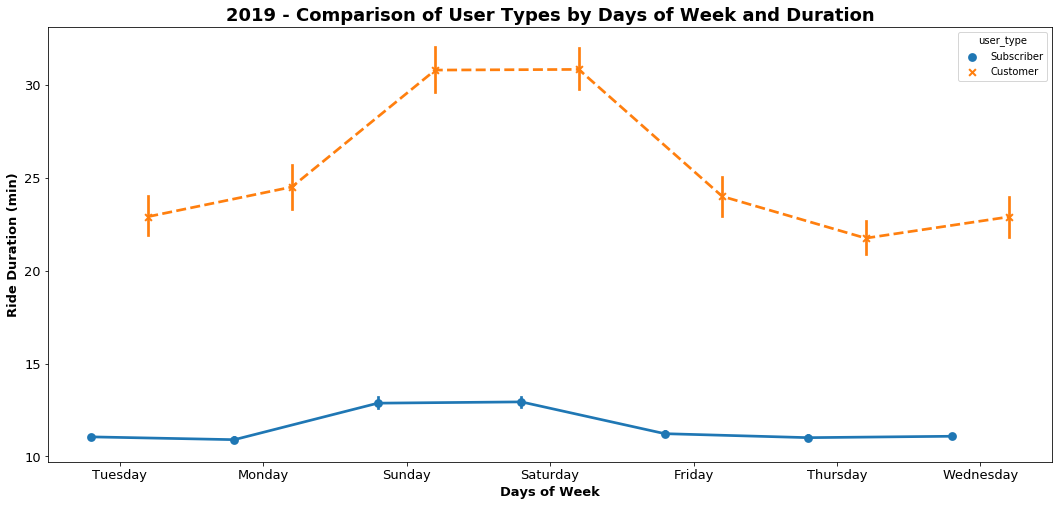

In [77]:
#user type vs duration vs day of week 
plt.figure(figsize=([18,8]))
sb.pointplot(data=df_19, x='start_day', y='duration', hue='user_type', markers=["o","x"],linestyles=["-", "--"], dodge=0.4)
plt.xlabel('Days of Week',fontsize=13, weight='bold')
plt.ylabel('Ride Duration (min)',fontsize=13, weight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('2019 - Comparison of User Types by Days of Week and Duration', fontsize=18, weight='bold');

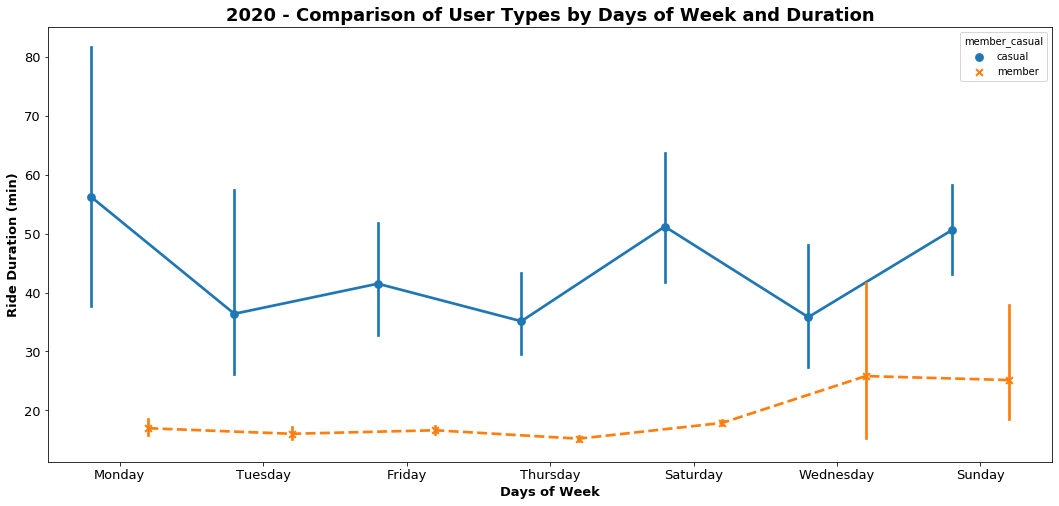

In [78]:
plt.figure(figsize=([18,8]))
sb.pointplot(data=df_20, x='start_day', y='duration', hue='member_casual', markers=["o","x"],linestyles=["-", "--"], dodge=0.4)
plt.xlabel('Days of Week',fontsize=13, weight='bold')
plt.ylabel('Ride Duration (min)',fontsize=13, weight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('2020 - Comparison of User Types by Days of Week and Duration', fontsize=18, weight='bold');

> **Observations:** For both 2019 & 2020, it can be interpreted that **Subscribers or Members** ride for lesser duration than **Customers (Casual)**. Also, weekends i.e. Saturday & Sunday are the most busy days of week when maximum bike rides take place.

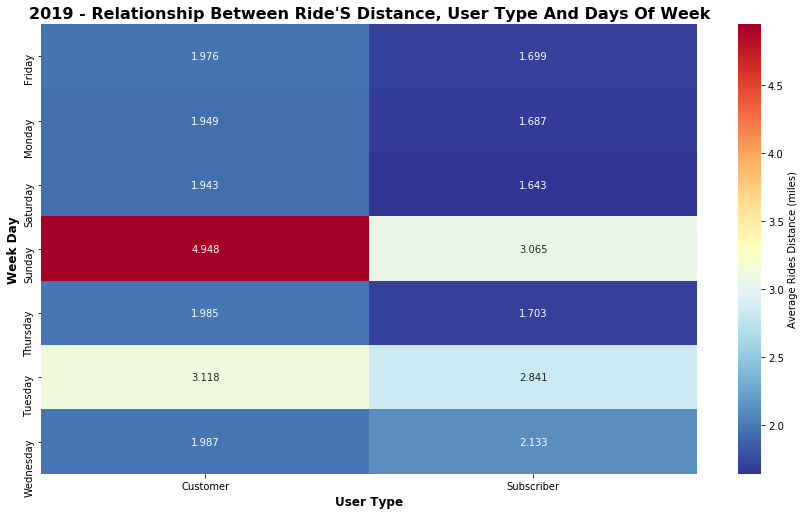

In [79]:
#days of week vs user type vs distance

plt.figure(figsize=[14.70, 8.27])
ride_means = df_19.groupby(['user_type','start_day']).mean()['distance_miles']
ride_means = ride_means.reset_index(name = 'distance_avg')
ride_means = ride_means.pivot(index = 'start_day', columns = 'user_type', values = 'distance_avg')

sb.heatmap(ride_means, annot = True, fmt = '.3f', 
           cbar_kws = {'label':'Average Rides Distance (miles)'}, cmap = 'RdYlBu_r')
# Add title and format it
plt.title("2019 - Relationship between ride's distance, user type and days of week".title(),
               fontsize = 16, weight = "bold")
# Add x label and format it
plt.xlabel('User Type'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Week Day'.title(),
               fontsize = 12, weight = "bold");

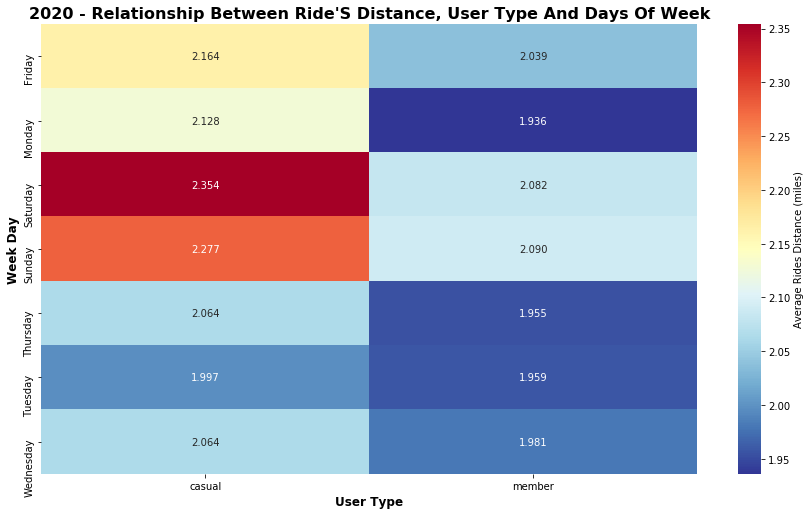

In [80]:
#days of week vs user type vs distance

plt.figure(figsize=[14.70, 8.27])
ride_means = df_20.groupby(['member_casual','start_day']).mean()['distance_miles']
ride_means = ride_means.reset_index(name = 'distance_avg')
ride_means = ride_means.pivot(index = 'start_day', columns = 'member_casual', values = 'distance_avg')

sb.heatmap(ride_means, annot = True, fmt = '.3f', 
           cbar_kws = {'label':'Average Rides Distance (miles)'}, cmap = 'RdYlBu_r')
# Add title and format it
plt.title("2020 - Relationship between ride's distance, user type and days of week".title(),
               fontsize = 16, weight = "bold")
# Add x label and format it
plt.xlabel('User Type'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Week Day'.title(),
               fontsize = 12, weight = "bold");

> **Observations:** For both 2019 & 2020, it can be interpreted that **Subscribers or Members** took rides for lesser distance than **Customers (Casual)**. Also, on weekends i.e. Saturday & Sunday, both user types preferred to take longer rides. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this Multivariate Visualization, we've put together: user type, distance in miles, duration of rides and weekdays. And now it's possible to affirm that customer and subscribers have very different behaviour. Subscribers use the Bay Wheels more frequently and on a weekday, it's part of their mobility journey in less duration of time. As for customers, they use Bay Wheels's bikes on the weekend, stays more time with it and use it to enjoy their free time.

So by analyzing this dataset, we were able to find out two very different groups of users, which have distinct behaviour and needs. Bay Wheels should understand both of their user types and base their strategical decisions to fully attend their needs.

### Were there any interesting or surprising interactions between features?

> We have seen that customers take longer rides than subscribers. This is expected as most of the customers are tourists and will travel longer distances to see the city. In 2020, we noticed an interesting trend where it seemed that customers were more active than subscribers. This is expected as most the people (who are subscribers) were working from home due to COVID-19.